# 준홍 kaggle 3번째 코드  

## 참고코드

https://www.kaggle.com/code/jiunkailee/company-bankruptcy-prediction-dt-rf-knn-nn

### kick point  
- density plot
- smote
- zscore
- confusion matrix(오차행렬 or 혼동행렬)

# import all the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read csv and set to display all columns

In [3]:
df = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
pd.set_option('display.max_columns', None)

# drop all na

In [4]:
df = df.dropna()

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [6]:
for name in df:
    print(name)

Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

# select only interested features

In [7]:
df1 = df[["Bankrupt?", " Net Income to Total Assets", " Interest Coverage Ratio (Interest expense to EBIT)",
         " Cash Flow to Liability", " Retained Earnings to Total Assets", " Total Asset Growth Rate", 
         " Operating Profit Rate", " Cash flow rate", " After-tax net Interest Rate", " Operating Profit Per Share (Yuan ¥)",
         " Operating Expense Rate", " Cash Flow to Sales", " Cash Reinvestment %", " Cash Flow Per Share", 
         " CFO to Assets", " Cash/Current Liability"]]

# check the type of all features 

In [8]:
df1.dtypes

Bankrupt?                                                int64
 Net Income to Total Assets                            float64
 Interest Coverage Ratio (Interest expense to EBIT)    float64
 Cash Flow to Liability                                float64
 Retained Earnings to Total Assets                     float64
 Total Asset Growth Rate                               float64
 Operating Profit Rate                                 float64
 Cash flow rate                                        float64
 After-tax net Interest Rate                           float64
 Operating Profit Per Share (Yuan ¥)                   float64
 Operating Expense Rate                                float64
 Cash Flow to Sales                                    float64
 Cash Reinvestment %                                   float64
 Cash Flow Per Share                                   float64
 CFO to Assets                                         float64
 Cash/Current Liability                                

# see the distribution of all the features

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSubplot:title={'center':' Cash Flow to Liability'}>],
       [<AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>],
       [<AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Cash Flow to Sales'}>],
       [<AxesSubplot:title={'center':' Cash Reinvestment %'}>,
        <AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' CFO t

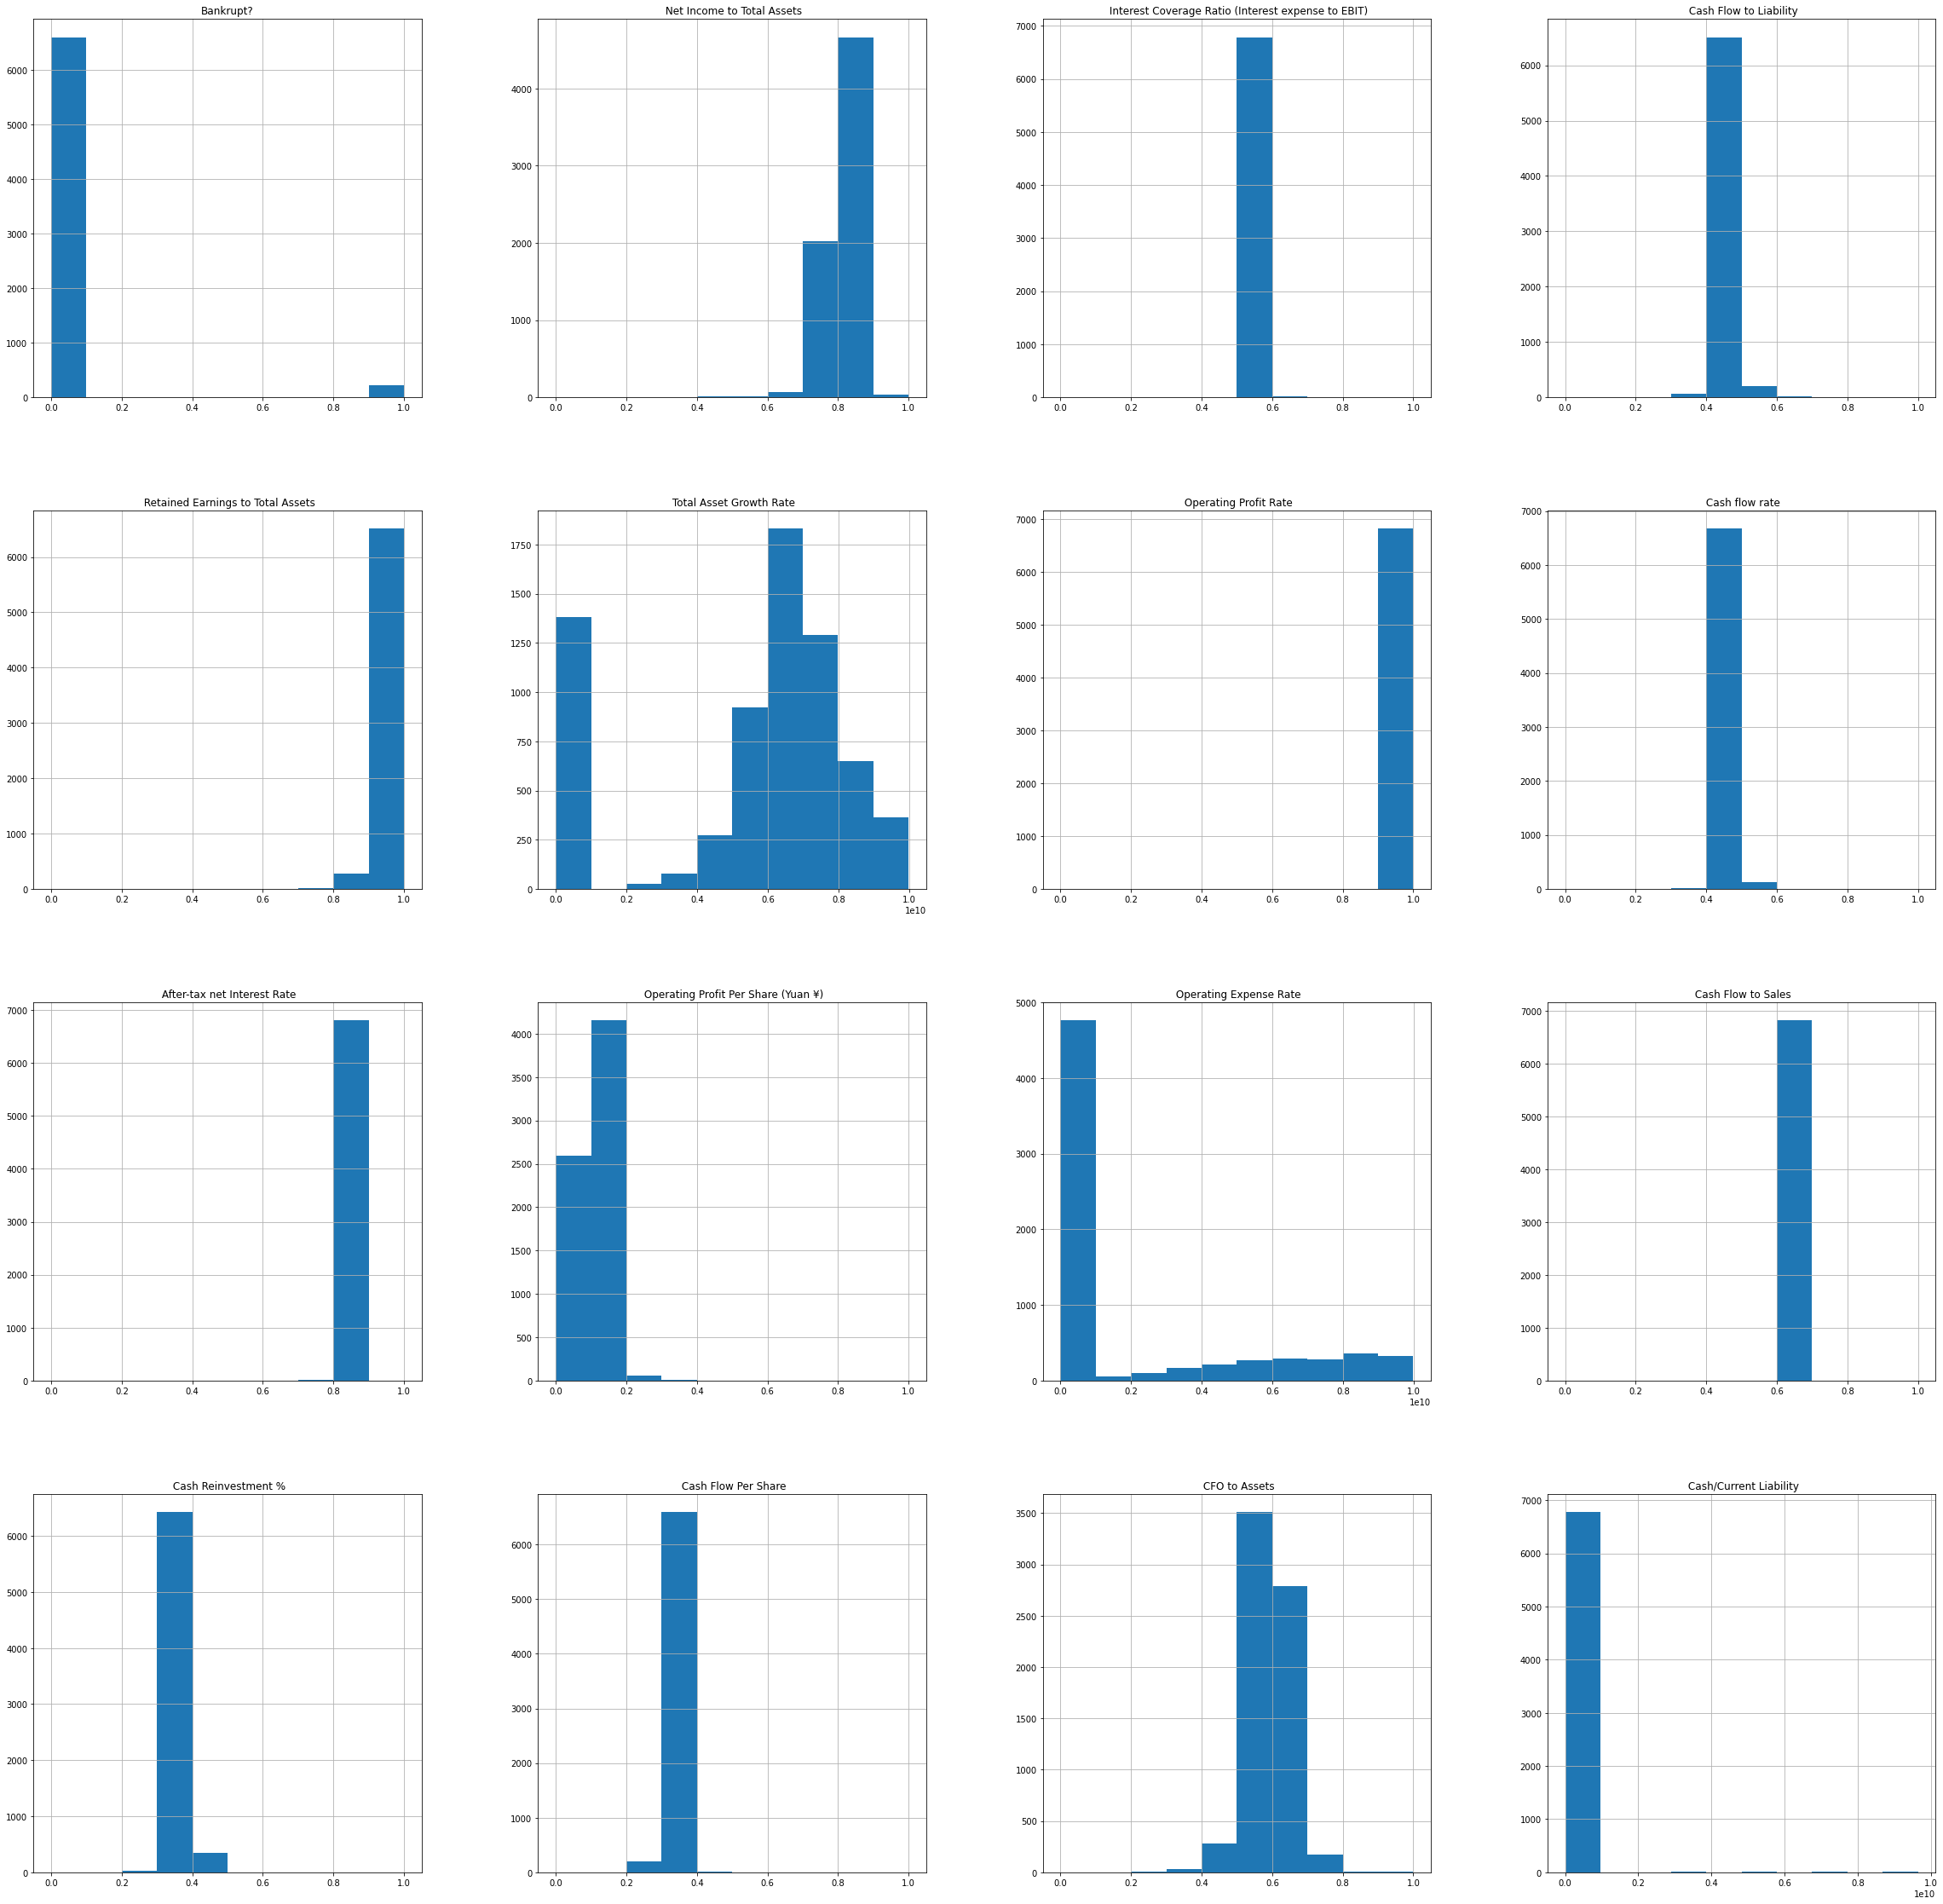

In [9]:
df1.hist(figsize = (40,40))

# bankruptcy과 각 변수의 관계 강도를 관찰하기 위해 상관 행렬을 구성합니다.

<AxesSubplot:>

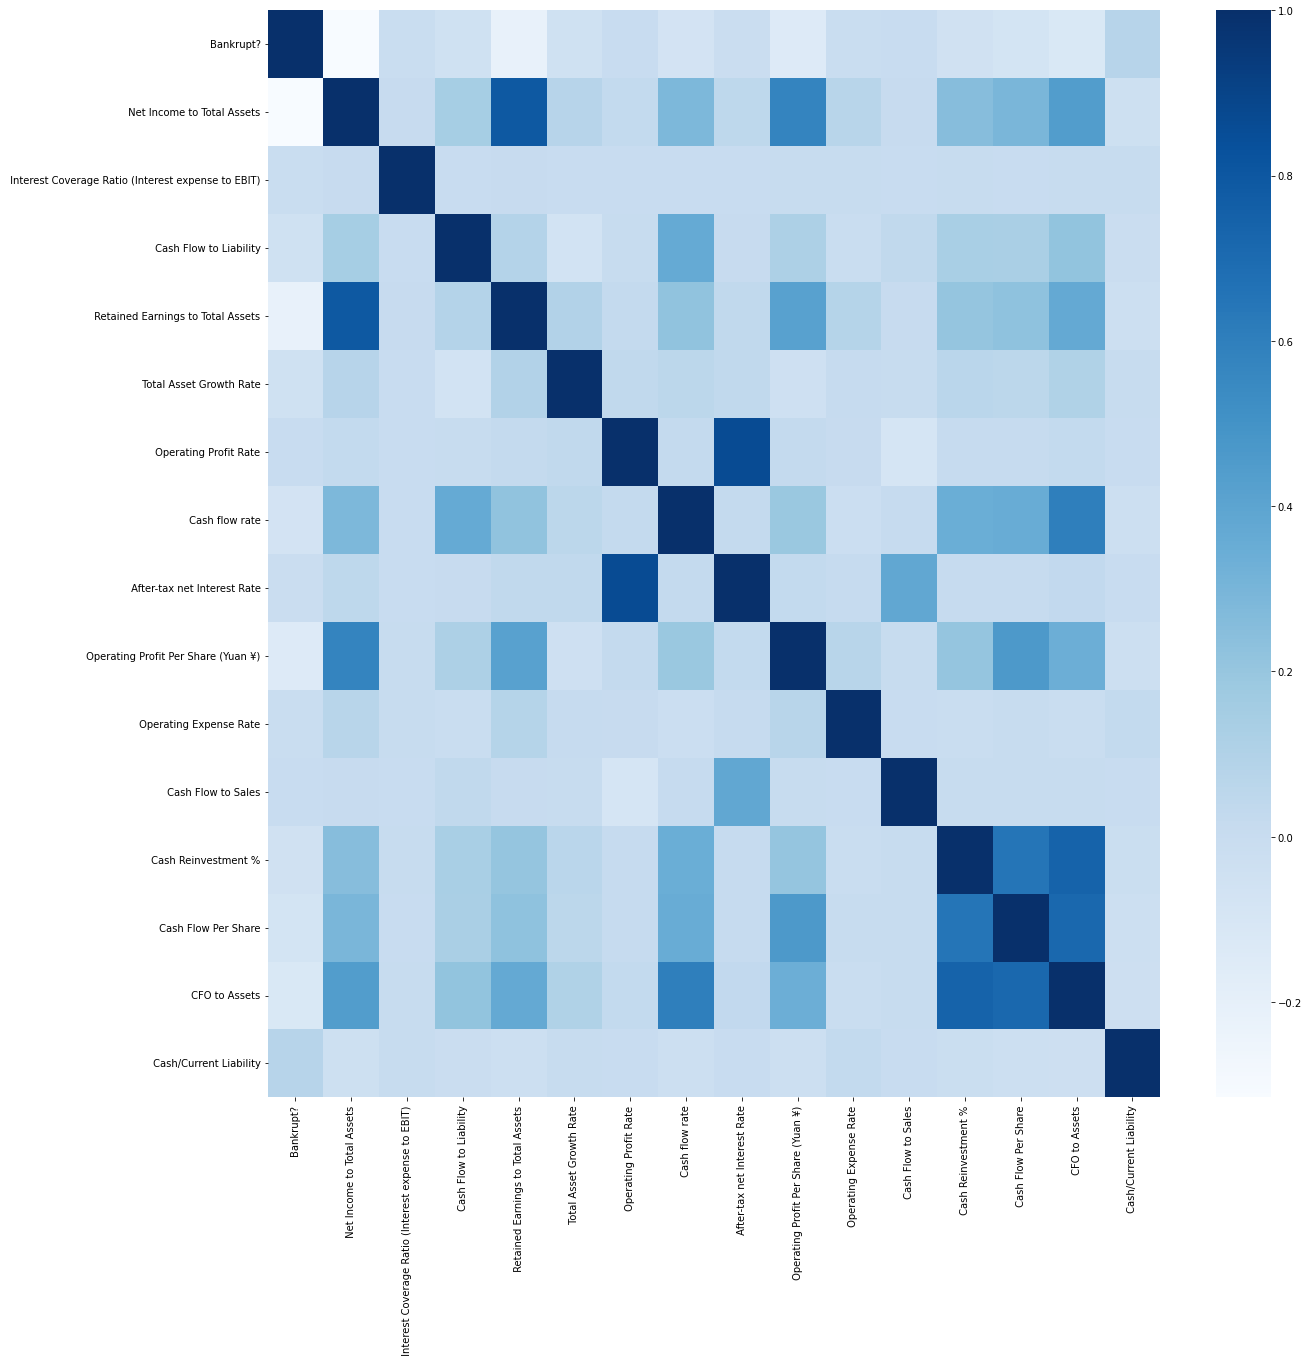

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), cmap = "Blues")

# 관심변수와 bankruptcy의 관계를 관찰하기 위해 density(밀도) plot을 구성합니다.

Text(0.5, 1.0, 'Relationship between bankrupt events and Net income to total assets')

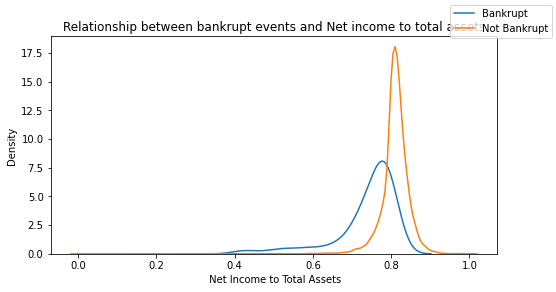

In [11]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Retained Earnings to Total Assets')

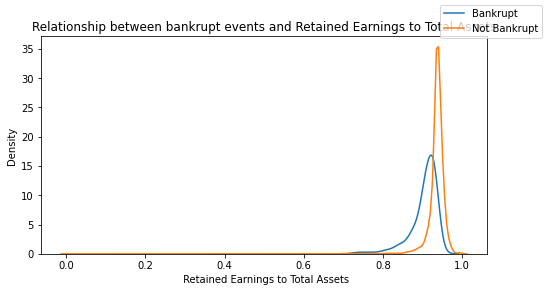

In [12]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Retained Earnings to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Retained Earnings to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Retained Earnings to Total Assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Total Asset Growth Rate')

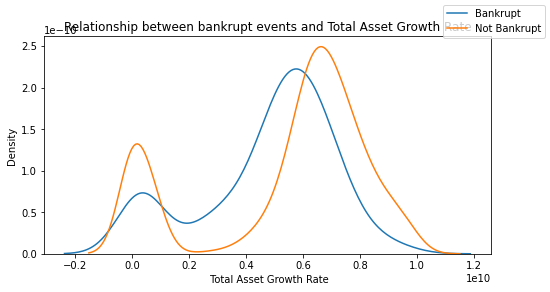

In [13]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Total Asset Growth Rate'])
sns.kdeplot(df[df['Bankrupt?']==0][' Total Asset Growth Rate'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')

# set X and Y variables

In [14]:
X = df1.drop(columns = "Bankrupt?")
Y = df1["Bankrupt?"]

# split to train set and test set

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

# SMOTE the variables to correct the imbalanced dataset

불균형 데이터처리를 위해 SMOTE합니다.


In [16]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

# Normalise the train set

In [17]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

# Decision tree

In [18]:
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.6129032258064516


# Feature importance of variables 

<AxesSubplot:>

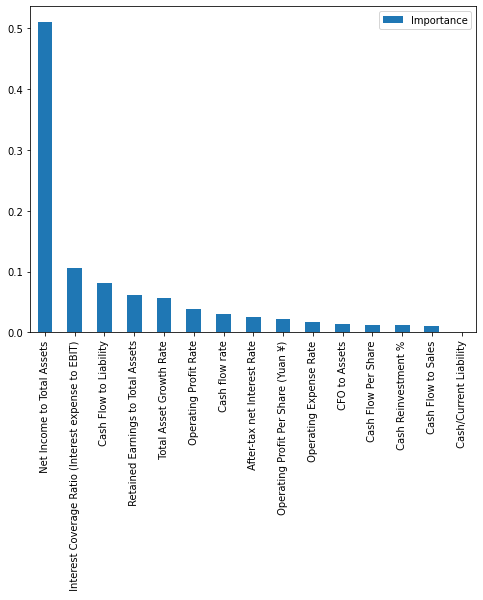

In [19]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

# Confusion matrix - Decision tree

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

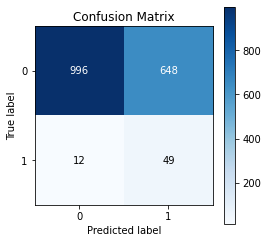

In [20]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

# Random forest

In [21]:
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.6234604105571847


# Feature importance of each variable

<AxesSubplot:>

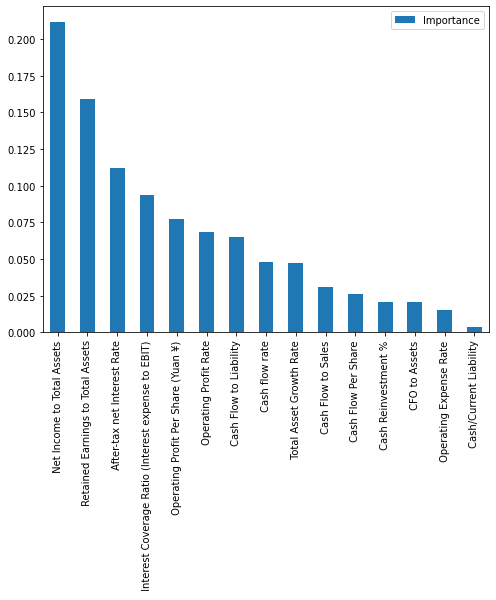

In [22]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

# Confusion Matrix - Random Forest

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

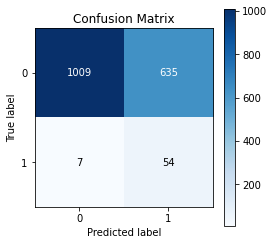

In [23]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

# K Nearest Neighbours

In [24]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  0.9980827447023208
Test set Accuracy:  0.7601173020527859


# Confusion Matrix - KNN

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

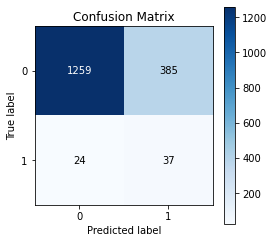

In [25]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

# Neural network

In [26]:
model = neural_network.MLPClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  0.9699293642785065
Test set Accuracy:  0.6140762463343109


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Confusion Matrix - NN

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

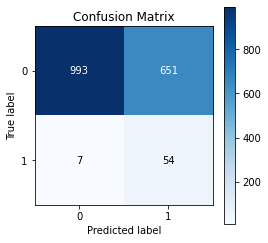

In [27]:
skplt.metrics.plot_confusion_matrix(
    Y_test, 
    pred,
    figsize=(4,4))

가장 좋은 모델은 K Nearest Neighbour이지만 false positive(FP) 오류가 높습니다.  
(즉, 61번 중 17번이라도 bankruptcy을 잘못 예측했습니다.)

.